# G2M insight for cab investment firm

## Case study : Market Analysis for Cab Industry Investment Decision

### Project Objective:

The primary objective of this project is to provide XYZ with actionable insights derived from multiple data sets related to two cab companies. Each dataset focuses on different aspects of the customer profile. By analyzing these datasets, XYZ seeks assistance in identifying the most suitable cab company for their investment.


### Data set details : 

The datasets are from this time period - 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users
    

### G2M EDA and hypothesis testing

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import dates as mdates, pyplot as plt, style as style
import missingno as msno
from scipy import stats
from scipy.stats import norm, skew
from datetime import date, timedelta, datetime
%matplotlib inline

In [144]:
# cab data
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [145]:
#city data 
city_data = pd.read_csv("City.csv")
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [146]:
# customer ID data
customer_data = pd.read_csv("Customer_ID.csv")
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [147]:
#transaction ID of customer 
transaction_data = pd.read_csv("Transaction_ID.csv")
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [148]:
#combining all the data 
all_data= cab_data.merge(transaction_data, on= 'Transaction ID').merge(customer_data, on ='Customer ID').merge(city_data, on = 'City')
all_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [149]:
# size of the dataset all combined
print("Number of rows: ", all_data.shape[0])
print("Number of columns: ", all_data.shape[1])

Number of rows:  359392
Number of columns:  14


In [150]:
# Checking the data types and details
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [151]:
# statistical description of the data
all_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


### Data Cleaning / Preprocessing

In [152]:
#checking if there are any null values
all_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [153]:
# Coverting date of travel time from ordinal number to data type 
#all_data["Date of Travel"] = all_data["Date of Travel"].apply(lambda x: date(1899,12,30) + timedelta(x))
#all_data.head()
min_date = all_data['Date of Travel'].min()
max_date = all_data['Date of Travel'].max()

trans_min = datetime.fromordinal(datetime(1899, 12, 30).toordinal() + min_date - 2).strftime("%d-%m-%Y")
trans_max = datetime.fromordinal(datetime(1899, 12, 30).toordinal() + max_date - 2).strftime("%d-%m-%Y")

print(trans_min)
print(trans_max)

def convert_date(date):
    convert = datetime.fromordinal(datetime(1899, 12, 30).toordinal() + date - 2).strftime("%d-%m-%Y")
    return datetime.strptime(convert, "%d-%m-%Y")
all_data['Date of Travel'] = all_data['Date of Travel'].apply(lambda x: convert_date(x))
all_data.head()

31-12-2015
29-12-2018


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-21,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-19,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [154]:
print("Minimum Date: ", all_data['Date of Travel'].min())
print("Maximum Date: ", all_data['Date of Travel'].max())

Minimum Date:  2015-12-31 00:00:00
Maximum Date:  2018-12-29 00:00:00


In [155]:
def convert_int(x):
    return int(x.replace(',', ''))
all_data['Population'] = all_data['Population'].apply(lambda x: convert_int(x))
all_data['Users'] = all_data['Users'].apply(lambda x: convert_int(x))
all_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-21,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-19,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [156]:
all_data['Profit'] = all_data['Price Charged'] - all_data['Cost of Trip']
all_data['Year'] = all_data['Date of Travel'].dt.year
all_data['Month'] = all_data['Date of Travel'].dt.month
all_data['Day'] = all_data['Date of Travel'].dt.day
all_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,Month,Day
0,10000011,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,1,6
1,10351127,2018-07-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,7,19
2,10412921,2018-11-21,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,11,21
3,10000012,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,1,4
4,10320494,2018-04-19,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,4,19


In [157]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

#### Investigating categorical and numerical data 

<AxesSubplot:>

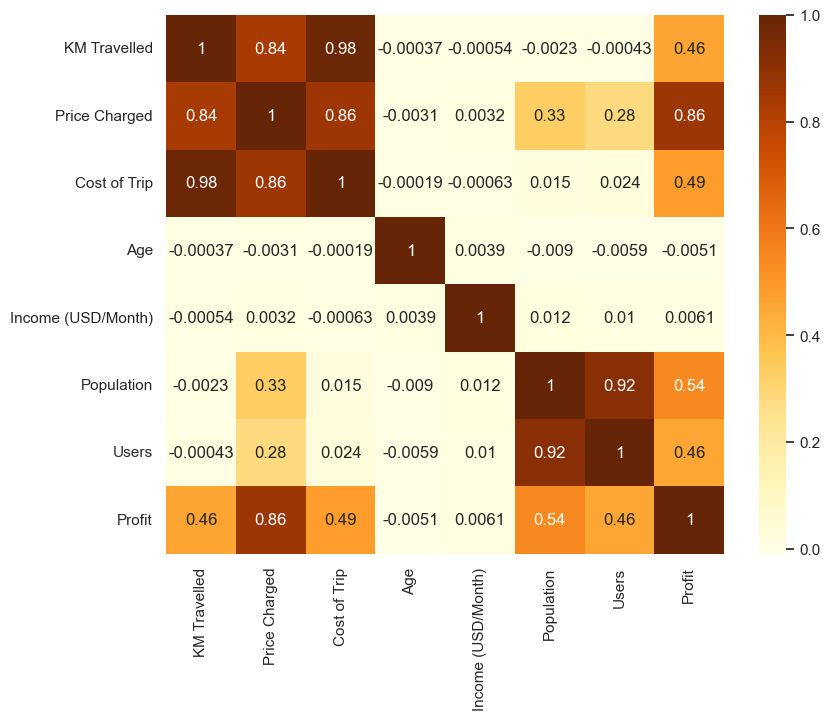

In [158]:
# checking correlation in numerical data 
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(all_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Profit']].corr(), annot=True, cmap="YlOrBr", ax=ax)

##### Conclusion: 
 KM Travelled is related to the column Price Charged, and Cost of Trip.
 Profit is also strongly related to price charged. 
 There is strong correlation between population and user as well. 

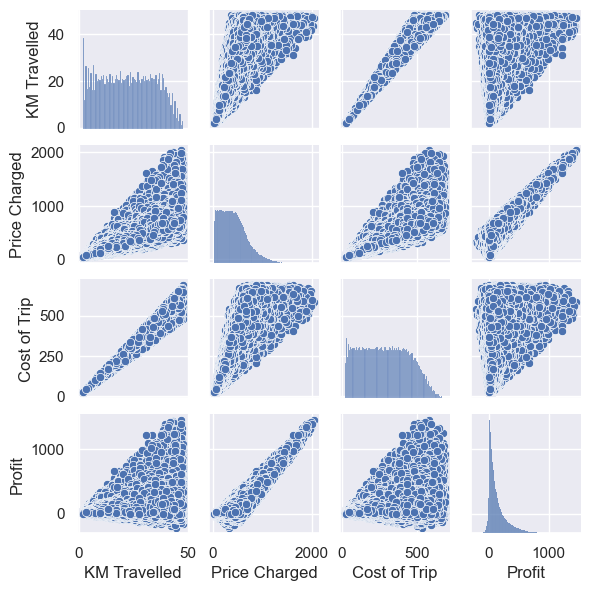

In [159]:
# checking the relationship between KM travelled, price charged, cost of trip and profit.
sns.pairplot(data=all_data[['KM Travelled', 'Price Charged', 'Cost of Trip', "Profit"]], height=1.5)
plt.show()

In [160]:
categorical_col = ['Company', 'City', 'Payment_Mode', 'Gender']
for name in categorical_col:
    print(f"*************{name}****************")
    print("TOTAL: ", all_data[name].count())
    print(all_data[name].value_counts())

*************Company****************
TOTAL:  359392
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
*************City****************
TOTAL:  359392
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64
*************Payment_Mode****************
TOTAL:  359392
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
*************Gender****************
TOTAL:  359392
Male      205912
Female    153480
Name: Gender, dtype: int64


##### conclusion :
They are only two types of Cab companies Yellow Cab and Pink Cab. 
Yellow Cab is widely preferred by the customers.
Payment_Mode - Card payment has 2/3rd of the Cash payment.
Also, Male and Female customers ratio is 4:3

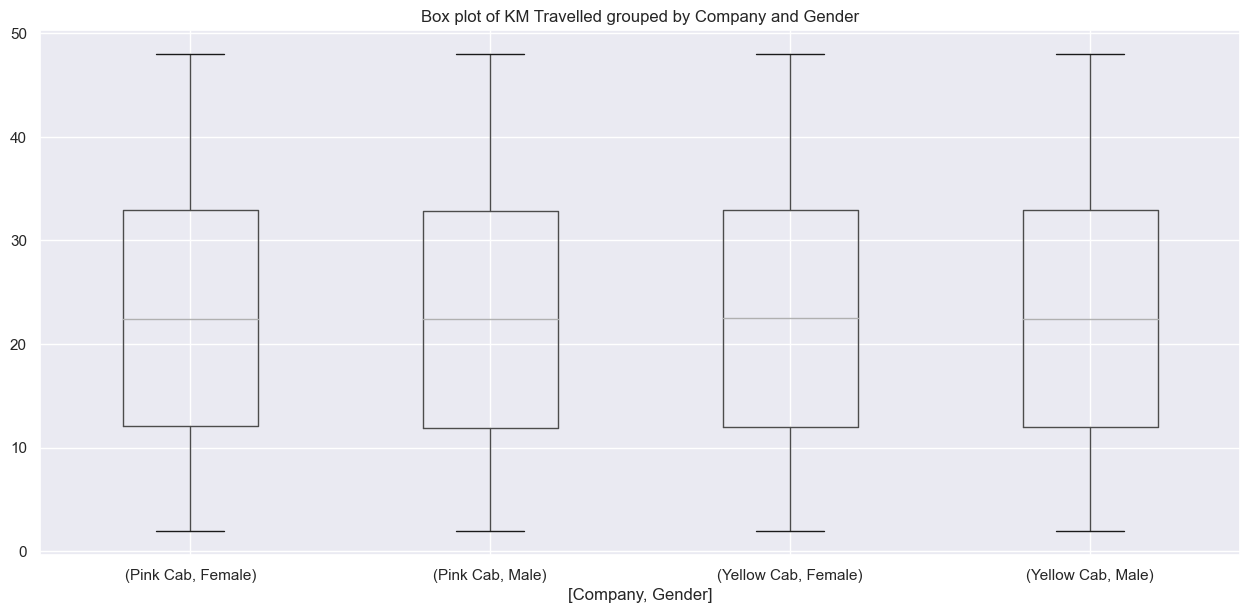

In [161]:
# checking to see if there are outliers in the data by categorical data
all_data.boxplot(column='KM Travelled', by=['Company', 'Gender'], figsize=(15, 7))
plt.title('Box plot of KM Travelled grouped by Company and Gender')
plt.suptitle("")
plt.show()

###### Conclusion:
We see that there are no outliers in the data.

### Transaction and profit analysis

<AxesSubplot:title={'center':'Total Transactions by Payment Mode'}, xlabel='Company', ylabel='count'>

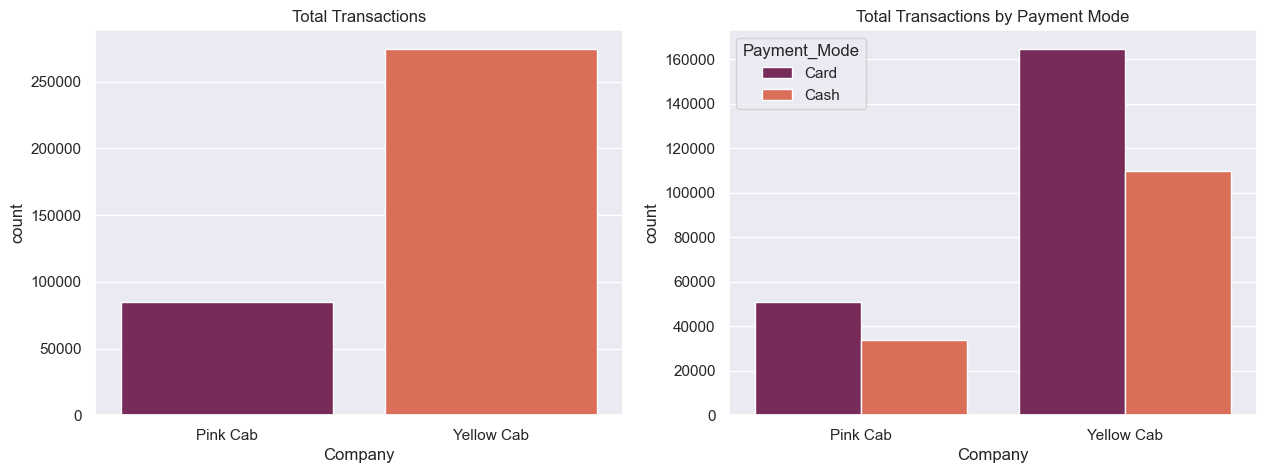

In [162]:
f = plt.figure(figsize=(15, 5))

f.add_subplot(1,2,1)
plt.title("Total Transactions")
#sns.set_style("whitegrid")
sns.countplot(x="Company", data=all_data, palette = "rocket")

#
f.add_subplot(1,2,2)
plt.title("Total Transactions by Payment Mode")
#sns.set_style("whitegrid")
sns.countplot(x="Company", hue="Payment_Mode", data=all_data, orient="k", palette="rocket")

###### conclusion:
From the plot below, we can see that the Yellow Cab company has overwhelmingly processed more transactions than Pink Cab. 
For both companies, the majority of payments where made by Card. This suggests that users of both cab companies find this payment method more convenient.

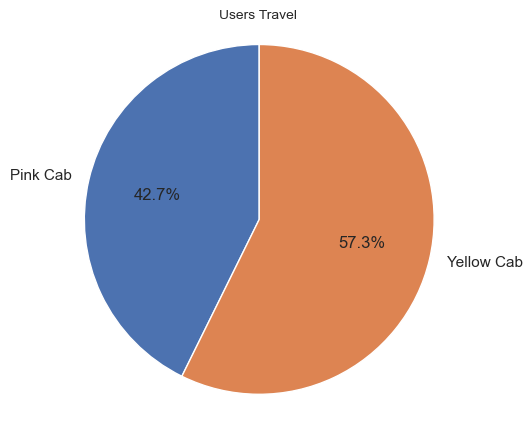

In [163]:
user=all_data.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 
figp, axp = plt.subplots(figsize=(5,5))
axp.pie(value , labels=index, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 10)
plt.show()

###### conclusion: 
    yellow company has more users than pink cab

/Users/farzanachowdhury/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


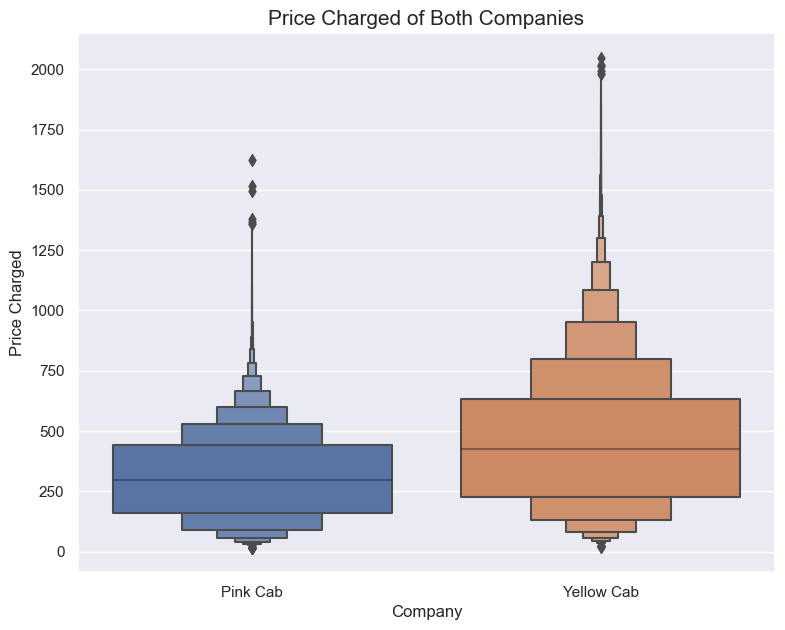

In [164]:
# price charged 
sns.set(style = 'darkgrid')
plt.figure(figsize = (9,7))

sns.boxenplot(all_data['Company'], all_data['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=15)
plt.show()

###### conclusion : 
Price charged in yellow cab is higher than pink cab,

In [165]:
all_data['Year'].value_counts()

2017    128196
2018    122721
2016    108294
2015       181
Name: Year, dtype: int64

In [166]:
pink_cab_profit=all_data[all_data.Company=='Pink Cab'].groupby(all_data['Year']).Profit.mean()
yellow_cab_profit=all_data[all_data.Company=='Yellow Cab'].groupby('Year').Profit.mean()

print("Pink Cab Profit:\n", pink_cab_profit)
print("\nYellow Cab Profit:\n", yellow_cab_profit)

Pink Cab Profit:
 Year
2015    117.302951
2016     68.816389
2017     66.633717
2018     53.068422
Name: Profit, dtype: float64

Yellow Cab Profit:
 Year
2015    323.540294
2016    169.417488
2017    168.299775
2018    143.491148
Name: Profit, dtype: float64


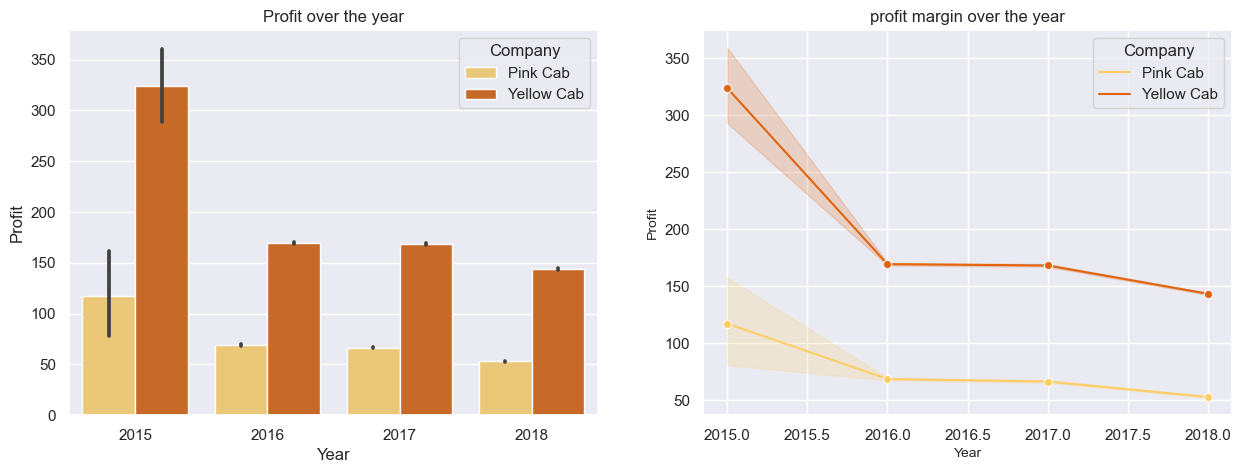

In [167]:
# profit for two cabs over the year
f = plt.figure(figsize=(15, 5))
f.add_subplot(1,2,1)
plt.title("Profit over the year")
sns.barplot(x="Year",y ="Profit" , hue="Company", data=all_data, palette="YlOrBr")

# profit margin 
f.add_subplot(1,2,2)
sns.lineplot(x='Year', y='Profit', hue="Company", data=all_data, marker='o', palette = "YlOrBr")
plt.xlabel("Year", size=10)
plt.ylabel("Profit", size=10)
plt.title("profit margin over the year")
plt.show()

###### Conclusion : 
    Yellow cab has significantly more profit in years than pink cab, and 2015 was the most profitable year. 
    We also notice profit margin has decreased over the years. 

### Location analysis 

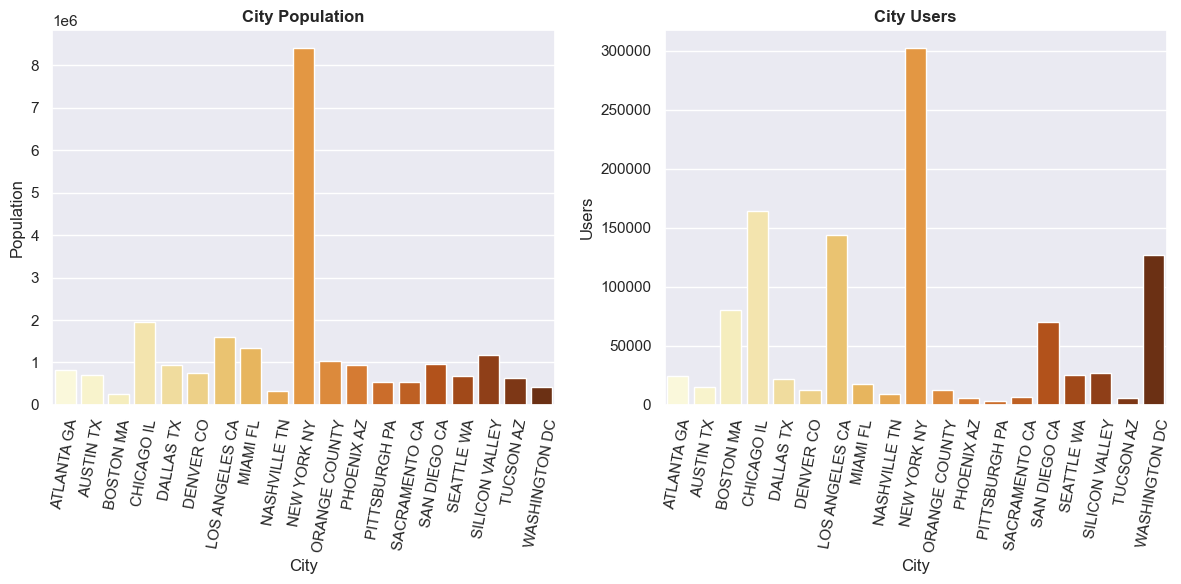

In [173]:
# location of transactions
f2 = plt.figure(figsize=(12,6))

# City Population
f2.add_subplot(1,2,1)
plt.title("City Population",fontweight='bold')
sns.barplot(x="City", y="Population", data=all_data, palette="YlOrBr")
plt.xticks(rotation=80)


# City Users
f.add_subplot(1,2,2)
plt.title("City Users",fontweight='bold')
sns.barplot(x="City", y="Users", data=all_data, palette="YlOrBr")
plt.xticks(rotation=80)
f.tight_layout()

##### It seems like New york has the most population, thus New york has the most number of cab user. 

In [169]:
# avg users of population per city 
import math 
avg_user = (all_data.Users/ all_data.Population)
avg_user_percentage = avg_user , 100
avg_percentage= math.prod( avg_user_percentage)
avg_percentage 

0          3.031225
1          3.031225
2          3.031225
3          3.031225
4          3.031225
            ...    
359387    30.320705
359388    30.320705
359389    30.320705
359390    30.320705
359391    30.320705
Length: 359392, dtype: float64

In [170]:
all_data.insert(15, "avg_user_population",  avg_percentage, True)
all_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,avg_user_population,Year,Month,Day
0,10000011,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,3.031225,2016,1,6
1,10351127,2018-07-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,3.031225,2018,7,19
2,10412921,2018-11-21,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,3.031225,2018,11,21
3,10000012,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,3.031225,2016,1,4
4,10320494,2018-04-19,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,3.031225,2018,4,19


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

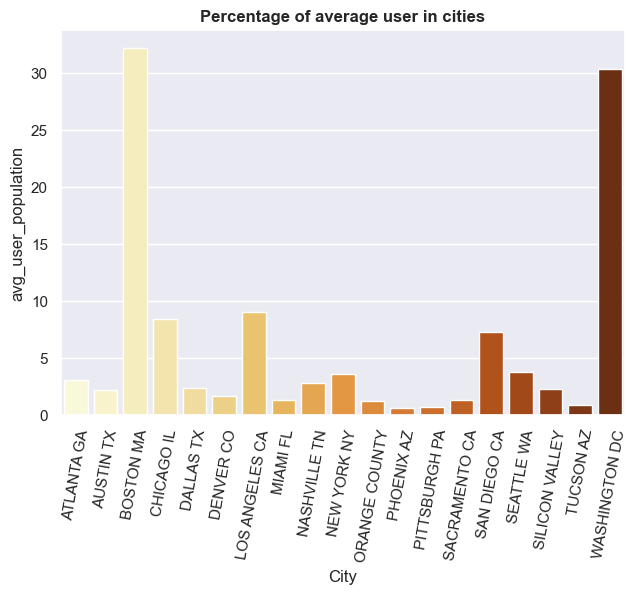

In [188]:
# location of transactions
f2 = plt.figure(figsize=(16,5))

# City Population
f2.add_subplot(1,2,1)
plt.title("Percentage of average user in cities",fontweight='bold')
sns.barplot(x="City", y="avg_user_population", data=all_data, palette="YlOrBr")
plt.xticks(rotation=80)

#### Here we can see different result, based on user average, Boston, Ma has the most percentage of users. Washiongton, DC has the second most users. 

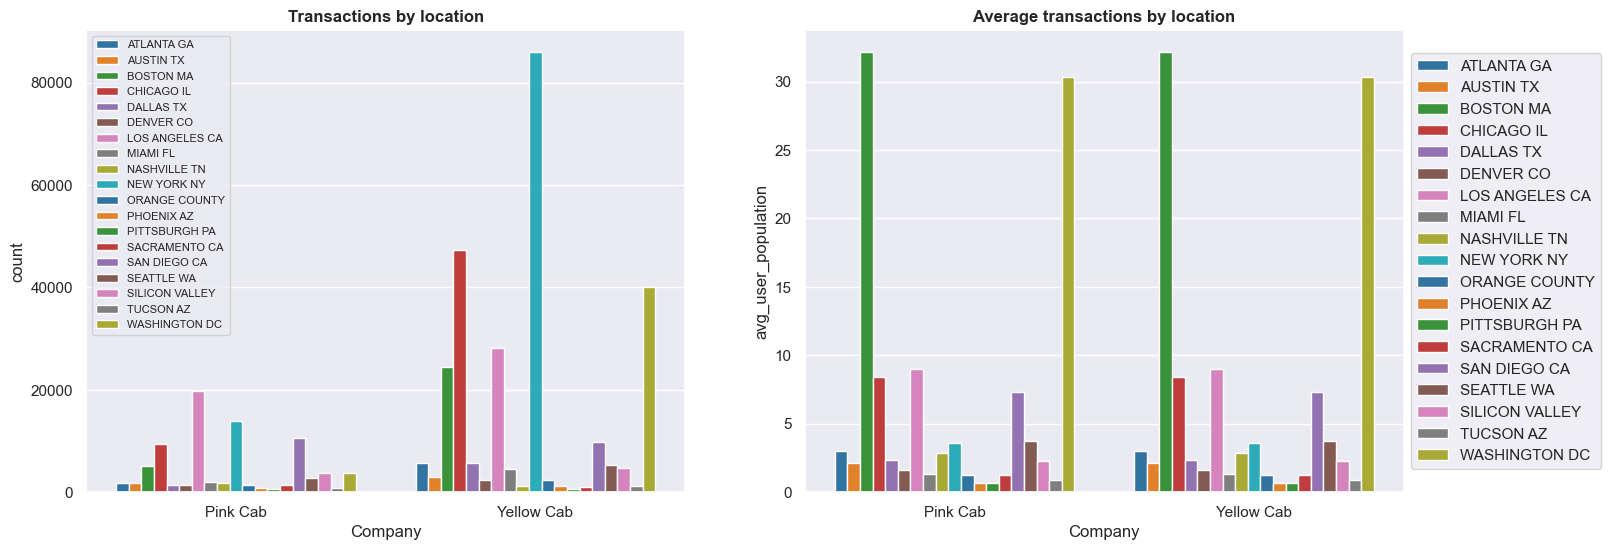

In [207]:
# location of transactions
f1 = plt.figure(figsize=(17,6))
# Transactions by location
f1.add_subplot(1,2,1)
plt.title("Transactions by location",fontweight='bold')
sns.countplot(x="Company", hue="City", data=all_data, palette="tab10")
plt.legend(loc="upper left", prop={'size': 8})


# transaction by avg people in locations
f1.add_subplot(1,2,2)
plt.title("Average transactions by location",fontweight='bold')
sns.barplot(x="Company", y="avg_user_population" , hue="City", data=all_data, palette="tab10")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##### Conclusion: 
New york has the most trasaction of cabs, in particular, yellow cab has more transaction. 
But, if we notice average trasaction cities by poluation, we see a difference scenario. Both pink cab, and yellow cab has almost same transaction, and average user. 
And, Boston MA, and Washington DC has the most average cab user. 

<AxesSubplot:title={'center':'Histogram of kilometers travelled'}, xlabel='KM Travelled', ylabel='Count'>

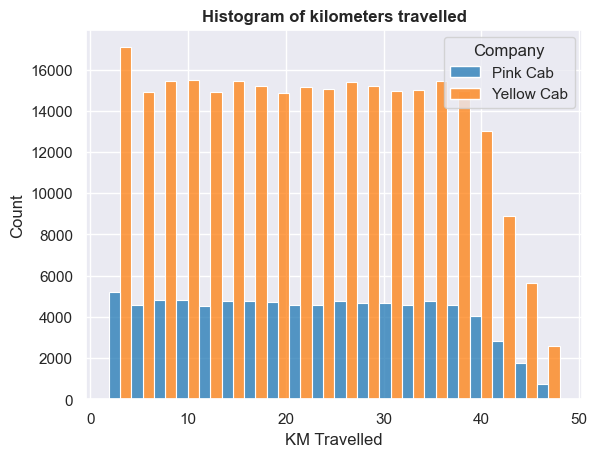

In [230]:
# Kilometers travelled by the companies 
plt.title("Histogram of kilometers travelled", fontweight="bold")
sns.histplot(data=all_data, x='KM Travelled', hue='Company', multiple='dodge', palette= "tab10", bins=20)

##### Most of the cabs travelled within 50 kilometeres 

### Time analysis 

<Figure size 1000x300 with 0 Axes>

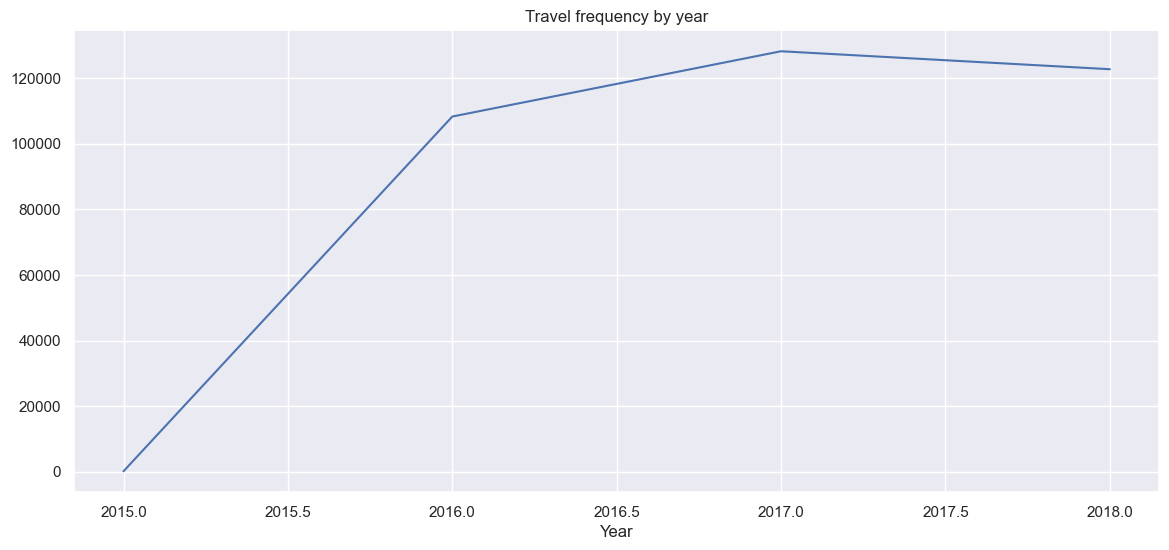

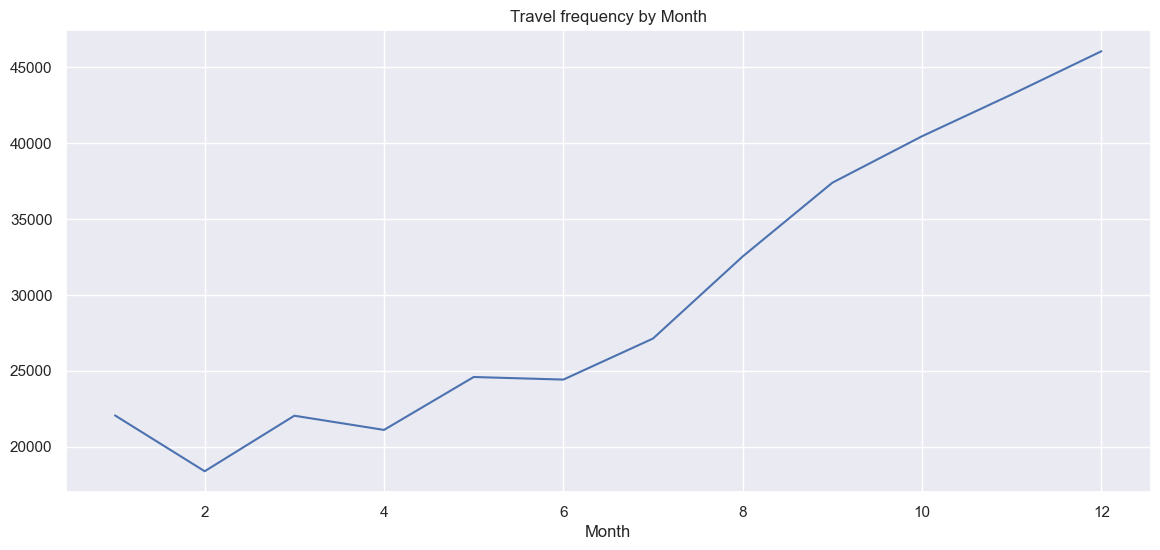

In [247]:
# travel time analysis 
f1 = plt.figure(figsize=(10,3))
#data grouped by Transaction ID
year_transaction =all_data.groupby(['Year'])['Transaction ID'].count()
#Analysis-Yearly Transaction 
plt.figure(figsize=(14,6))
sns.lineplot(x=year_transaction.index,y=ytr.values)
plt.title('Travel frequency by year')
plt.show()
#data grouped bt Transaction ID
month_transaction=all_data.groupby(['Month'])['Transaction ID'].count()
#Monthwise Analysis
plt.figure(figsize=(14,6))
sns.lineplot(x=month_transaction.index,y=mtr.values)
plt.title('Travel frequency by Month')
plt.show()


##### Conclusion: 
From yearly analysis, The highest number of travel was in the year of 2017. 
As we have less data for the year 2015, so it's showing less result. But with the analysis, we understand that 2016 had less number of travels with respect to years 2017 and 2018
From Monthly analysis, The highest number of transaction was in December. We can also notice a rising slope. 

### Payment Analysis

<AxesSubplot:title={'center':'Payment method'}, xlabel='Company', ylabel='Count'>

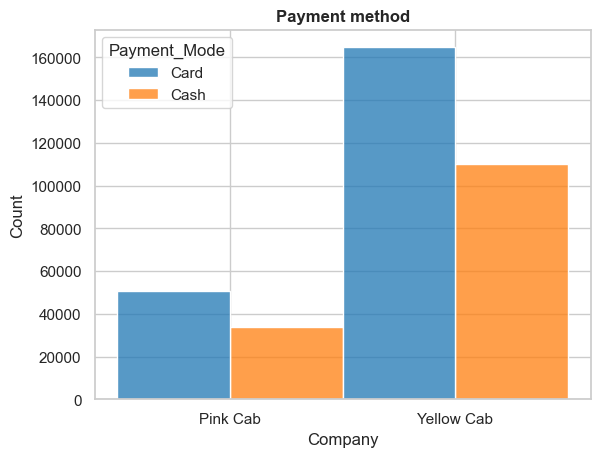

In [263]:
#f, ax = plt.subplots(figsize=(6, 7))
# sns.set(style="darkgrid")
#ax = sns.countplot(y='City', hue='Payment_Mode', data=all_data)
#plt.show()
plt.title("Payment method", fontweight="bold")
sns.histplot(data=all_data, x='Company', hue='Payment_Mode', multiple='dodge', palette= "tab10", bins=20)

##### we can see, users prefer paying with card than cash. 

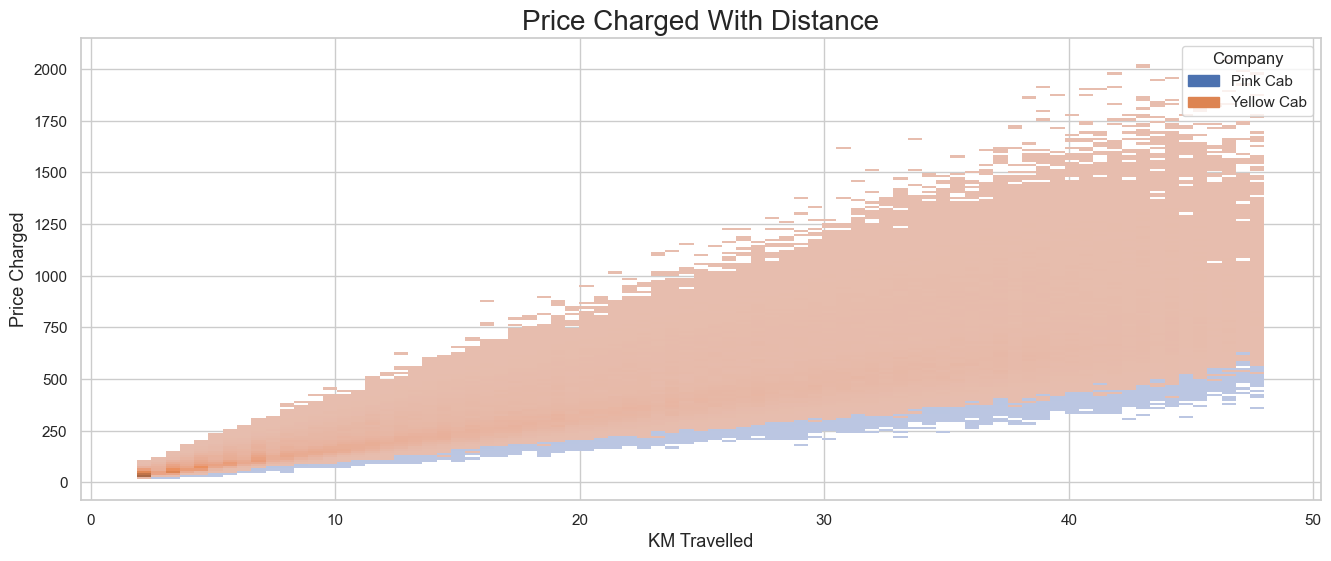

In [278]:
plt.figure(figsize = (16, 6))

sns.histplot(data=all_data, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged With Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 13)
plt.xlabel('KM Travelled',fontsize = 13)
plt.show()

##### we can see that, Price charged had positive linear relationship with Kilometer travelled. Thus, the price usually depends on distance of travel. 

### Customer Profile Analysis

#### User Gender Analysis

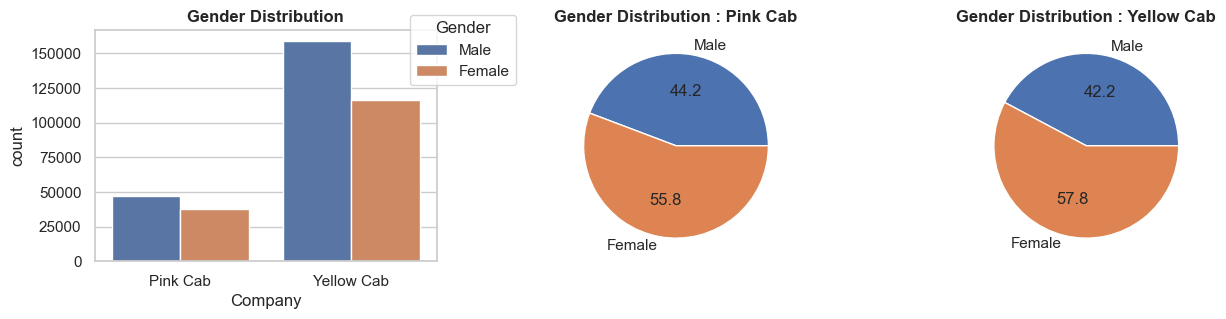

In [338]:
# User gender plot 
f = plt.figure(figsize=(15, 3))

# gender distribution
f.add_subplot(1, 3, 1)
plt.title("Gender Distribution", fontweight="bold")
ax= sns.countplot(data=all_data, x='Company', hue='Gender')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.9,1.1))
# gender distribution -  Pink Cab
f.add_subplot(1, 3, 2)
data = all_data["Gender"].loc[all_data['Company'] == "Pink Cab"]
data = pd.DataFrame(data, columns = ["Gender"])
data = data.groupby(by="Gender").size()
labels = all_data["Gender"].drop_duplicates(keep="first")
plt.title("Gender Distribution : Pink Cab", fontweight="bold")
plt.pie(data, labels = labels, autopct='%.1f')

# gender distribution: Yellow Cab
f.add_subplot(1, 3, 3)
data = all_data["Gender"].loc[all_data['Company'] == "Yellow Cab"]
data = pd.DataFrame(data, columns = ["Gender"])
data = data.groupby(by="Gender").size()
labels = all_data["Gender"].drop_duplicates(keep="first")
plt.title("Gender Distribution : Yellow Cab", fontweight="bold")
plt.pie(data, labels = labels, autopct='%.1f')
plt.show()


##### we can see that, for both pink and yellow cab, there are more male users. 

#### User Age Analysis

<AxesSubplot:title={'center':'Age of customers'}, xlabel='Age', ylabel='Count'>

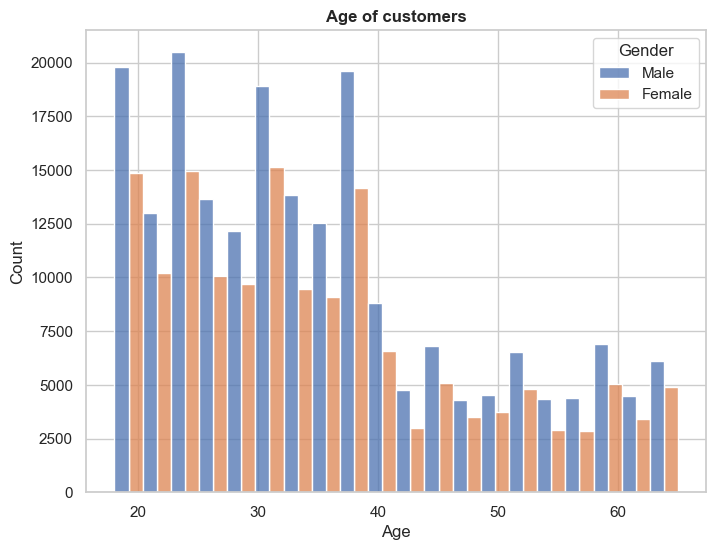

In [307]:
# plot
plt.figure(figsize=(8,6))
plt.title("Age of customers", fontweight="bold")
sns.set_style("whitegrid")
sns.histplot(data=all_data, x='Age', hue='Gender', multiple='dodge', bins=20)

##### Most of the customers are aged between 20-40years. 

### Hypothesis and Investigation 

### Hypothesis 1: Is there any difference in Profit regarding Age

H0 : There is no difference regarding Age in both cab companies.

H1 : There is difference regarding Age in both cab companies.

##### Pink Cab

In [349]:
a = all_data[(all_data.Age <= 60)&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = all_data[(all_data.Age >= 60)&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

80125 5429
P value is  0.4816748536155635
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


##### Yellow Cab

In [350]:
a = all_data[(all_data.Age <= 60)&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = all_data[(all_data.Age >= 60)&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

80125 5429
P value is  0.4816748536155635
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


### Hypothesis 2: Is the any difference in profit regarding gender?
H0 : There is no difference regarding Gender in both cab companies. 

H1 : There is difference regarding Gender in both cab companies.

##### Pink cab 

In [344]:
a = all_data[(all_data.Gender=='Male')&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = all_data[(all_data.Gender=='Female')&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


##### Yellow cab 

In [348]:
a = all_data[(all_data.Gender=='Male')&(all_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = all_data[(all_data.Gender=='Female')&(all_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  6.060473042494056e-25
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


### Hypothesis 3: Is there any difference in Profit regarding Payment mode

H0 : There is no difference regarding Payment_Mode in both cab companies. 

H1 : There is difference regarding Payment_Mode in both cab companies.

##### Pink cab

In [351]:
a = all_data[(all_data['Payment_Mode']=='Cash')&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = all_data[(all_data['Payment_Mode']=='Card')&(all_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793286
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


##### Yellow cab 

In [352]:
a = all_data[(all_data['Payment_Mode']=='Cash')&(all_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = all_data[(all_data['Payment_Mode']=='Card')&(all_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.2933060638298729
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab
